### `Business Problem`
**Context**

Syarah.com adalah platform online yang menawarkan mobil bekas dengan harga kompetitif kepada pelanggan di Arab Saudi. Di negara ini, memiliki kendaraan adalah kebutuhan penting karena cuaca panas sering membuat transportasi umum kurang nyaman. Oleh karena itu, pasar mobil bekas berkembang pesat, terutama di segmen mobil terjangkau. Syarah.com bertujuan memaksimalkan keuntungan dengan mendapatkan mobil bekas dari penjual yang menawarkan harga lebih murah atau bersifat negotiable (harga negotiable berarti harganya adalah 0).

**Problem Statement**

Seiring dengan pertumbuhan pesat pasar mobil bekas di Arab Saudi, tantangan utama yang dihadapi Syarah.com adalah bagaimana memaksimalkan profit dengan mendapatkan mobil bekas yang paling terjangkau dari penjual, khususnya mobil yang bersifat negotiable (harga 0). Strategi utama yang diperlukan adalah mengidentifikasi mobil-mobil yang berpotensi untuk dinegosiasikan tanpa mengorbankan profitabilitas, sekaligus menawarkan harga kompetitif kepada pelanggan.

**Goals**

Tujuan dari analisis ini adalah untuk memprediksi harga mobil berdasarkan karakteristik mobil, kondisi pasar, dan kemampuan negosiasi.

**Analytical Approach**

- Data Analysis: Memahami data yang tersedia tentang mobil bekas, termasuk fitur seperti harga, tahun pembuatan, merek, model, dan status negosiasi.
- Data Cleaning: Membersihkan data dari nilai yang hilang atau outlier, memastikan data siap digunakan untuk model.
- Data Preprocessing: Melakukan transformasi data.
- Model Development: Menggunakan teknik pembelajaran mesin (seperti regresi atau klasifikasi) 
- Model Evaluation: Mengevaluasi model untuk menilai kinerja model.

**Metric Evaluation**

## R-Squared (\(R^2\)):

**R-squared** atau koefisien determinasi adalah metrik yang mengukur seberapa baik model regresi mampu memprediksi target variabel dibandingkan dengan rata-rata target. Nilai \(R^2\) berkisar antara 0 hingga 1, di mana:

- \(R^2 = 1\) menunjukkan bahwa model dapat memprediksi semua data dengan sempurna.
- \(R^2 = 0\) menunjukkan bahwa model sama sekali tidak lebih baik daripada sekadar memprediksi rata-rata dari data.
- \(R^2 < 0\) menunjukkan bahwa model lebih buruk daripada prediksi rata-rata.

Secara matematis, \(R^2\) didefinisikan sebagai:


R^2 = 1 - RSS / TSS

Di mana:
- RSS adalah jumlah kuadrat dari kesalahan prediksi model.
- TSS adalah total variasi dari nilai target sebenarnya terhadap rata-ratanya.

Semakin tinggi nilai \(R^2\), semakin baik model dalam menjelaskan variasi data.

## Negative Mean Squared Error (neg\_mean\_squared\_error):

**Mean Squared Error (MSE)** adalah metrik yang digunakan untuk mengukur rata-rata dari kuadrat perbedaan antara nilai yang diprediksi oleh model dan nilai sebenarnya. Rumusnya adalah:

MSE = 1/n total(Y - Yi)^2

Di mana:
- Y adalah nilai target sebenarnya.
- Yi adalah nilai prediksi model.
- n adalah jumlah total data.

MSE memberikan penalti lebih besar untuk kesalahan prediksi yang besar karena nilai kesalahan dikuadratkan. Semakin kecil nilai MSE, semakin baik modelnya.

Namun, dalam evaluasi menggunakan `cross_val_score` di Python (misalnya dengan library `sklearn`), MSE sering digunakan dalam bentuk negatif (**neg\_mean\_squared\_error**). Ini dikarenakan `cross_val_score` secara default memaksimalkan skor. Oleh karena itu, MSE dibuat negatif agar metode ini tetap berfungsi. Semakin kecil (lebih mendekati 0) nilai **neg\_mean\_squared\_error**, semakin baik kinerja model.



### `Data Understanding`


The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Type | Object |  Type of Used Car |
| Region | Object | The region in which the used car was offered for sale |
| Make | Object | The Company Name |
| Gear_Type | Object | Gear type size of used car |
| Origin | Object | Origin of used car |
| Options | Object | Options of used car |
| Year | Integer | Manufacturing Year |
| Engine_Size | Float | The Engine Size of used car |
| Mileage | Integer | Mileage of used car |
| Negotiable | Boolean | True if the price is 0, that means it is negotiable |
| Price | Integer | Used car price |

<br>

In [26]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor    
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor                    
from sklearn.metrics import mean_squared_error, r2_score
from category_encoders import BinaryEncoder


### `Load Dataset`

In [27]:
df = pd.read_csv('data_saudi_used_cars.csv')
df

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


### `Data Analysis`

**Distribution of Price**

C:\Users\Robert\AppData\Local\Temp\ipykernel_28728\1373766496.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


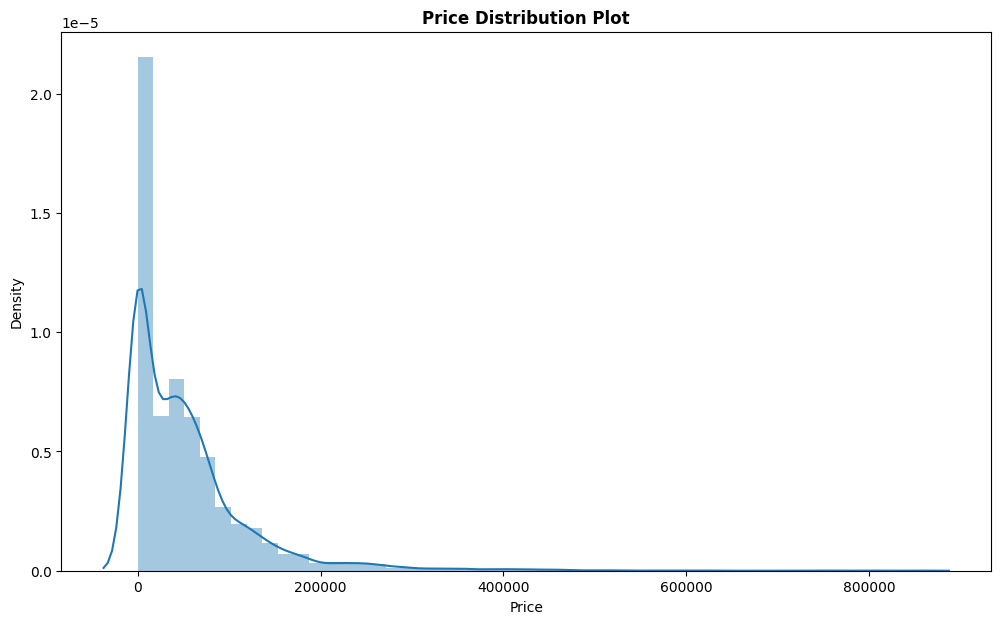

In [28]:
plt.figure(figsize=(12, 7))
sns.distplot(df['Price'])
plt.title('Price Distribution Plot', weight='bold')
plt.show()

Dari plot distribusi harga di atas, terlihat bahwa terdapat 'right-skewed distribution' atau Positive Skew pada fitur price.

**Understanding the Type, Region, Make, Gear_Type, Origin, Options, Year, Engine_Size trends**

In [29]:
print(f"Type related to price: \n{df['Type'].value_counts()}\n")
print(f"Region related to price: \n{df['Region'].value_counts()}\n")
print(f"Make related to price: \n{df['Make'].value_counts()}\n")
print(f"Year related to price: \n{df['Year'].value_counts()}\n")
print(f"Engine Size related to price: \n{df['Engine_Size'].value_counts()}\n")
#View as scrollable element

Type related to price: 
Type
Land Cruiser    269
Camry           234
Hilux           207
Accent          174
Yukon           162
               ... 
Nativa            1
360               1
GC7               1
CT5               1
S8                1
Name: count, Length: 347, dtype: int64

Region related to price: 
Region
Riyadh            2272
Dammam             925
Jeddah             733
Qassim             225
Al-Medina          214
Al-Ahsa            166
Aseer              163
Makkah             153
Taef               103
Tabouk              97
Khobar              76
Abha                64
Jazan               60
Hail                58
Jubail              56
Najran              42
Hafar Al-Batin      39
Al-Baha             35
Yanbu               27
Al-Jouf             27
Arar                22
Besha               16
Qurayyat            13
Al-Namas            12
Wadi Dawasir        12
Sakaka              10
Sabya                4
Name: count, dtype: int64

Make related to price: 
Make
T

Dari data yang kita punya,

**Most Popular Car Types**
1. Land Cruiser (269 units)
2. Camry (234 units)
3. Hilux (207 units)
4. Accent (174 units)
5. Yukon (162 units)

Terlihat bahwa Land Cruiser merupakan jenis mobil yang paling banyak

**Most Popular Regions**
1. Riyadh (2272 units)
2. Dammam (925 units)
3. Jeddah (733 units)
4. Qassim (225 units)
5. Al-Medina (214 units)

Terlihat bahwa Riyadh merupakan region paling banyak

**Most Popular Car Companies**
1. Toyota (1431 units)
2. Hyundai (670 units)
3. Ford (530 units)
4. Chevrolet (458 units)
5. Nissan (387 units)

Terlihat bahwa Toyota merupakan company yang paling banyak

**Most Common Years**
1. 2016 (847 units)
2. 2017 (566 units)
3. 2015 (554 units)

Inventori masih agak modern, berarti pelanggan syarah.com menginginkan mobil yang lebih ke arah modern.

**Engine Size**
1. 3.5L (511 units)
2. 2.0L (440 units)
3. 2.5L (439 units)
4. 1.6L (411 units)
5. 2.4L (385 units)

Kebanyakan size engine terdapat banyak di antara 1.6L - 3.5L

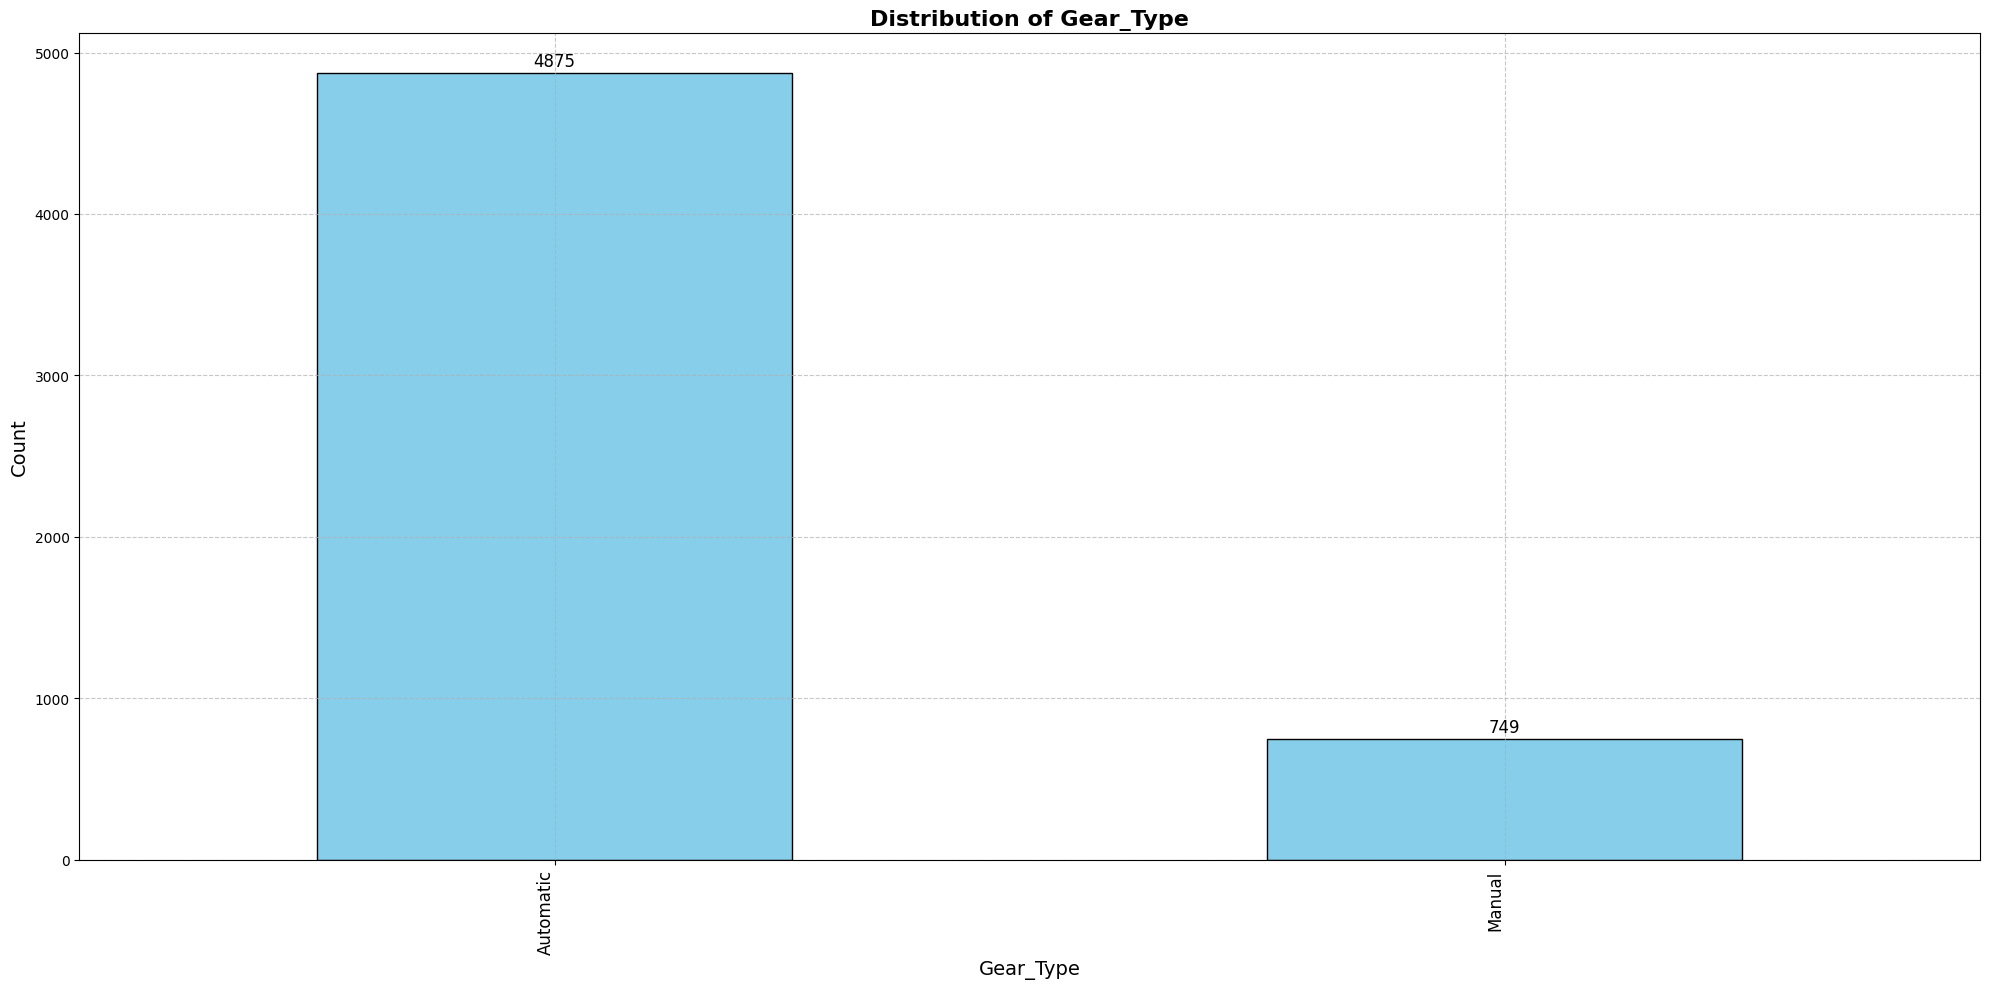

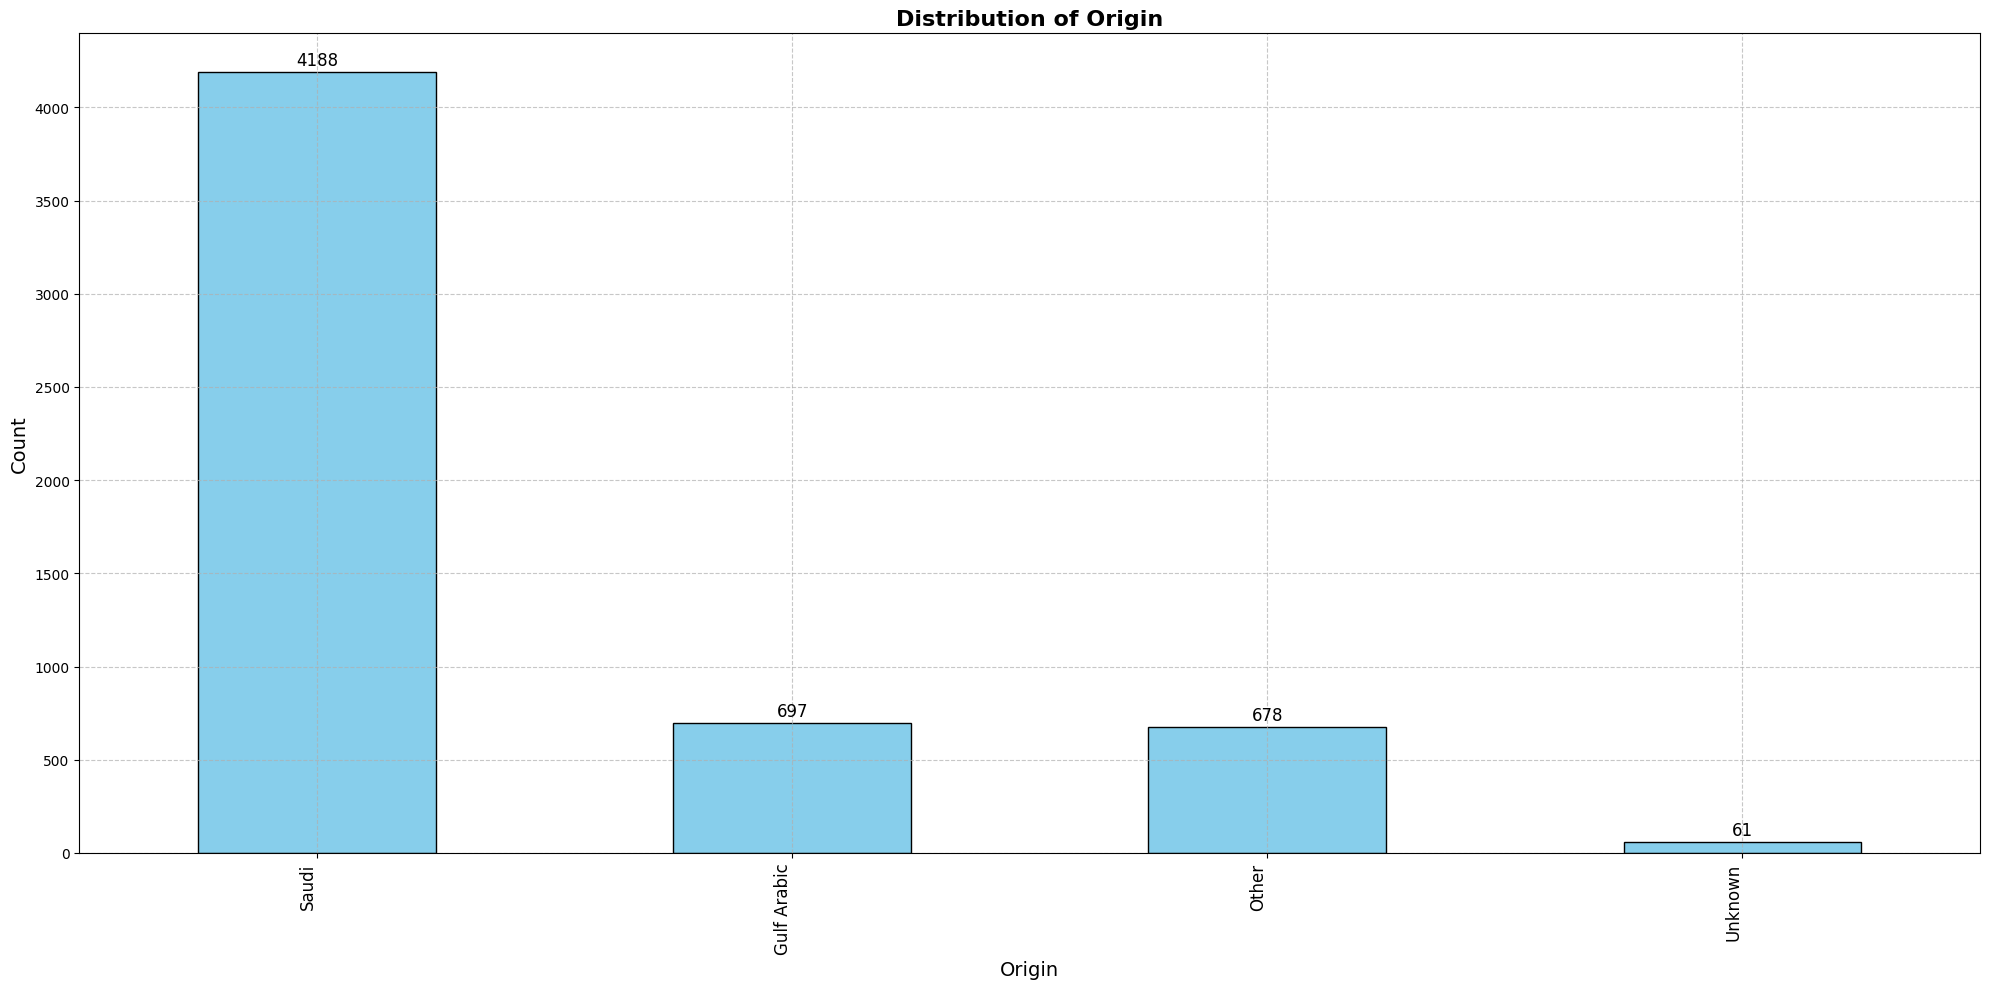

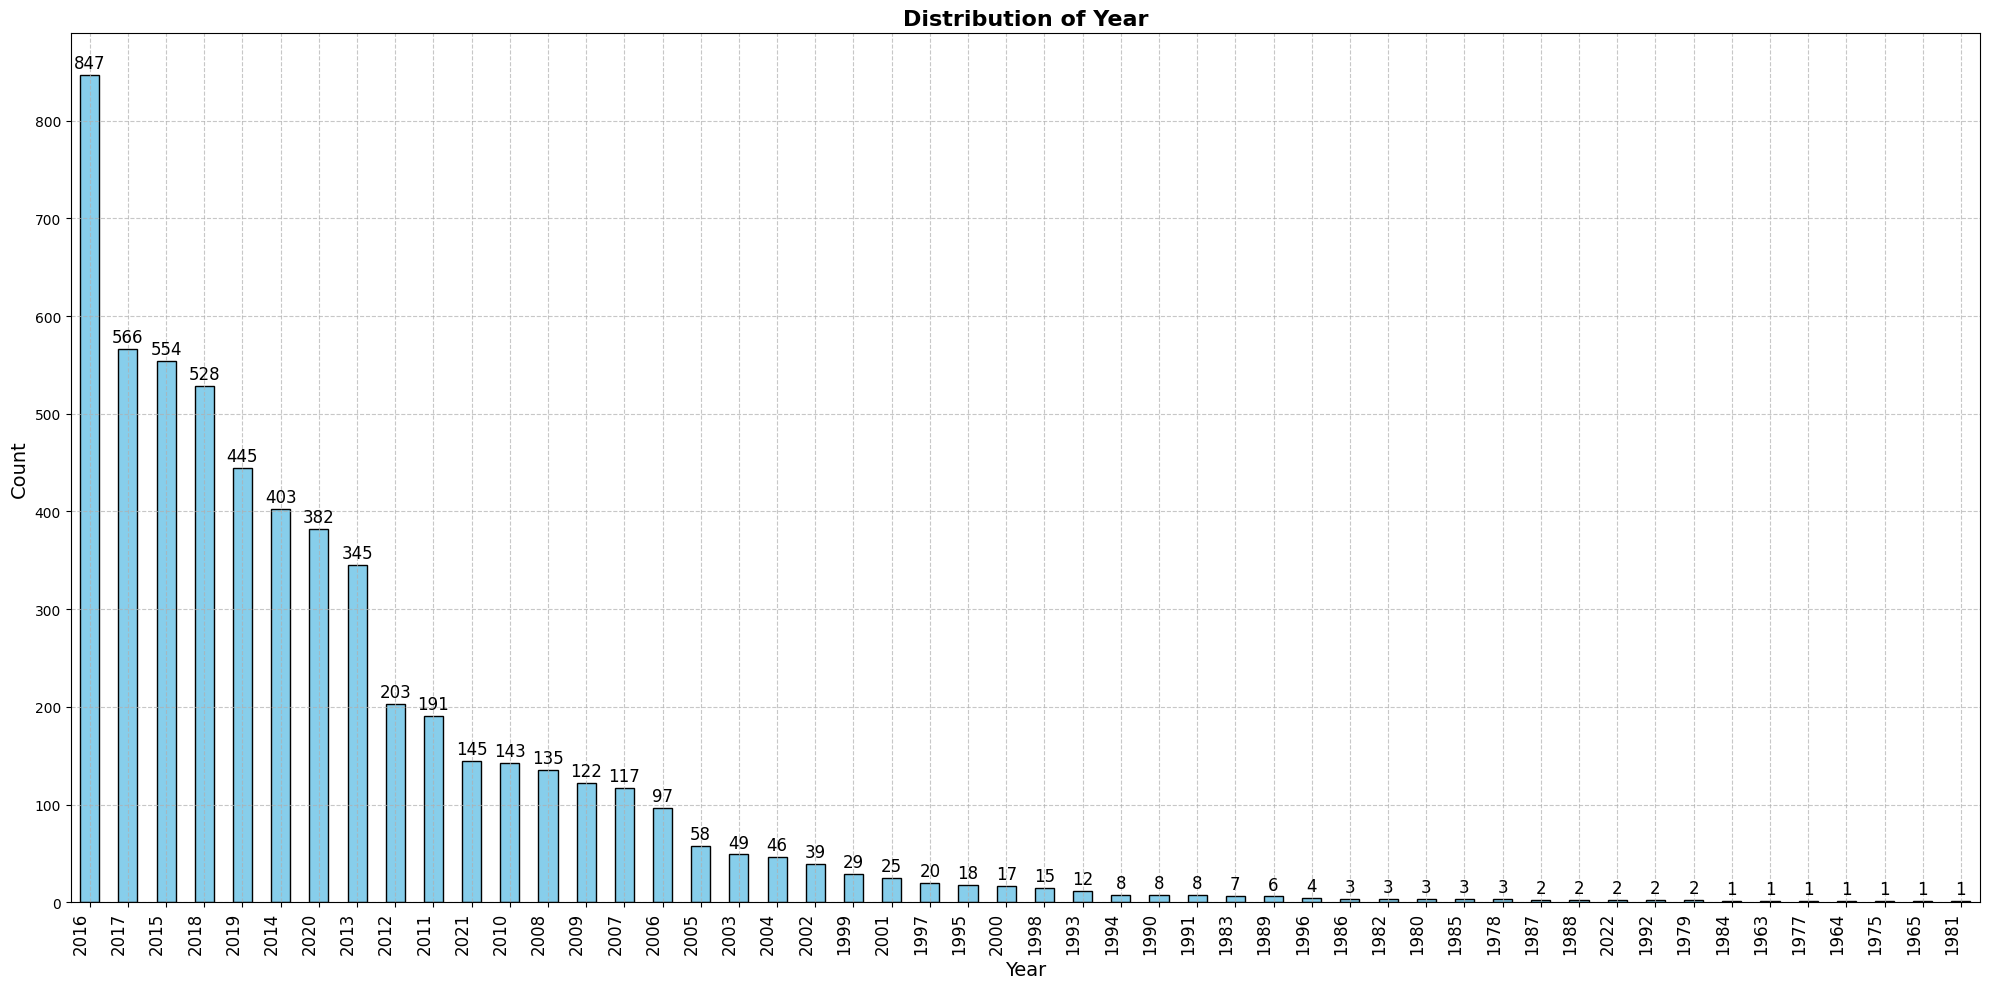

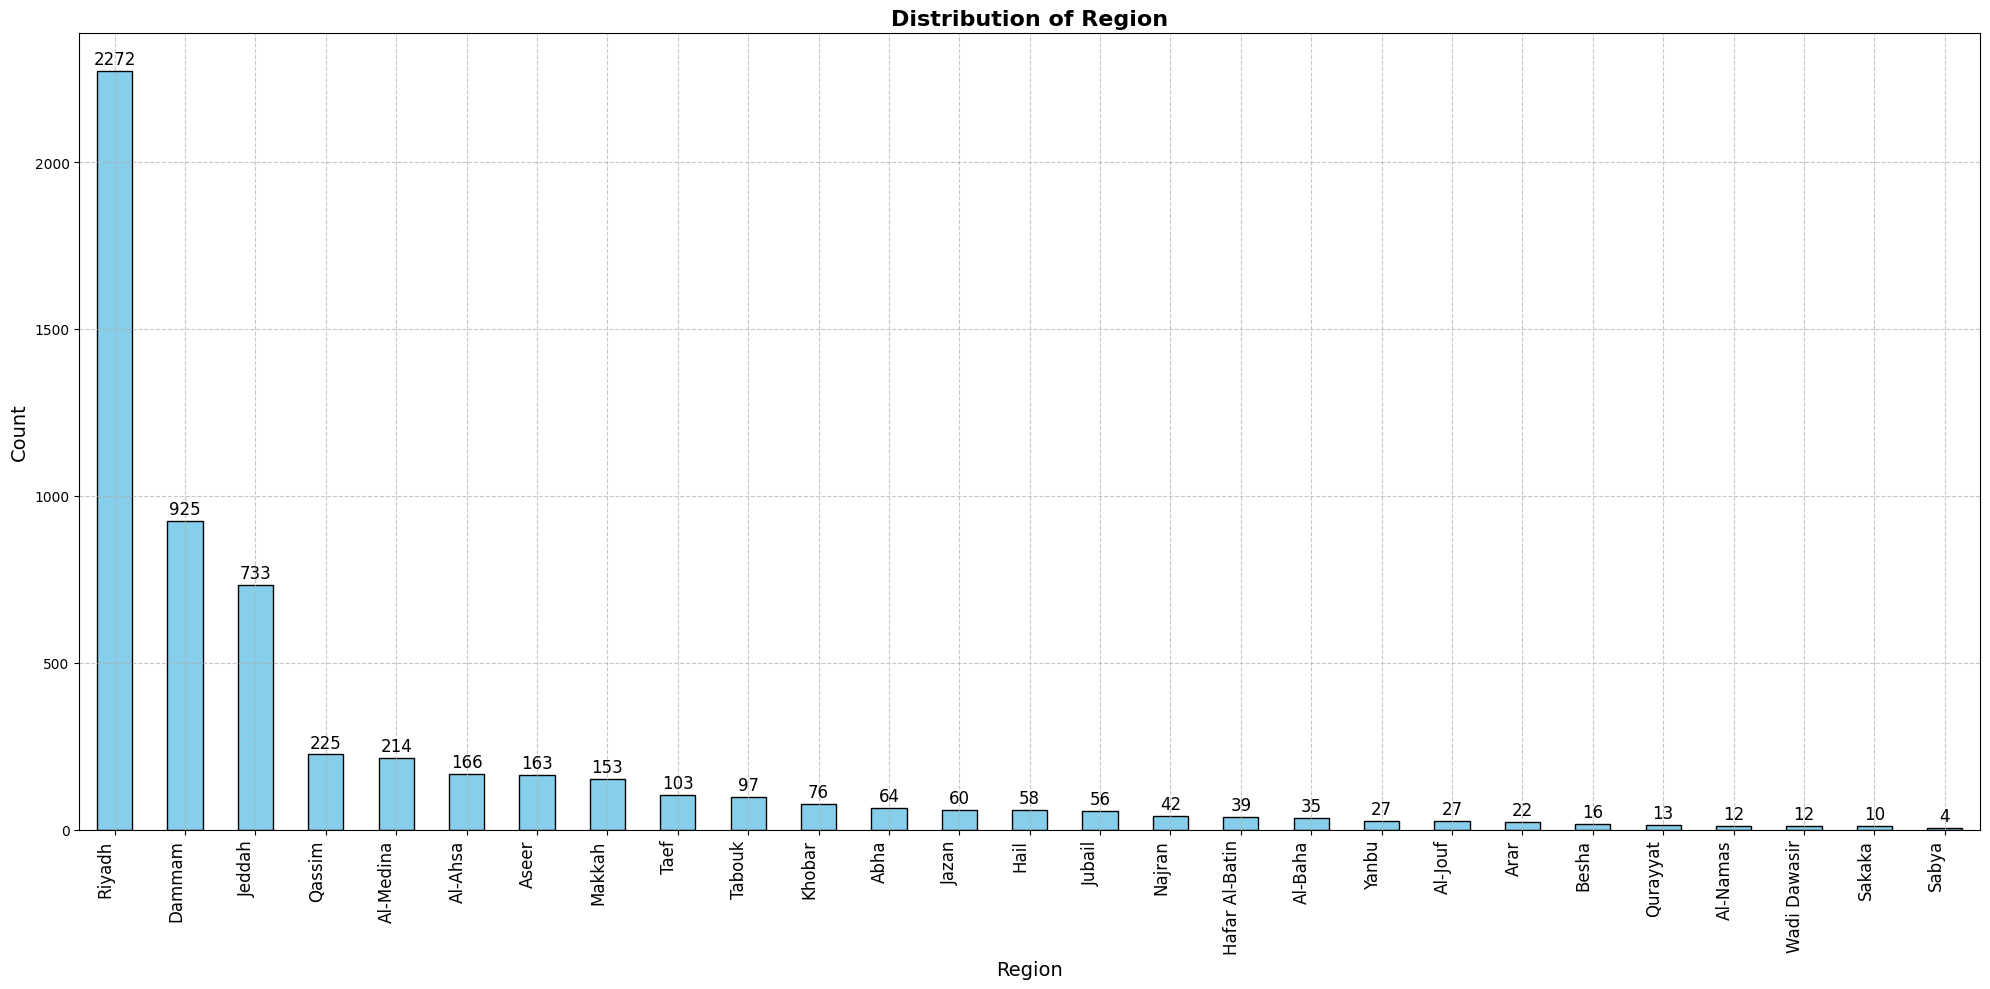

In [30]:
columns = ['Gear_Type', 'Origin', 'Year','Region']

for column in columns:
    plt.figure(figsize=(20, 10))
    ax = df[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f"Distribution of {column}", fontsize=16, fontweight='bold')
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Count", fontsize=14)

    ax.grid(True, linestyle='--', alpha=0.7)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    plt.xticks(rotation=90, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()

Dari Barplot-barplot di atas kita bisa conclude bahwa:
1. Kebanyakan mobil menggunakan automatic transmission dibanding manual transmission
2. Kebanyakan mobil originnya dari Saudi
3. Mobil-mobil lebih sering baru sekitaran tahun 2010s dibandingkan tahun-tahun sebelumnya.

**Numerical Features Description**

In [31]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


**Categorical Features Description**

In [32]:
df.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


### `Data Preprocessing`
Pada tahap ini, kita akan melakukan cleaning pada data, seperti:
- Drop fitur yang tidak perlu.
- Handling Missing Values.
- Handling Duplicated Values.
- Outlier Detection.
- VIF

**Remove Unused Data**

Tidak ada fitur/column yang di remove karena semuanya berguna untuk memprediksi price

In [33]:
data = df.copy()
data

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


Pada bagian Origin juga ada yang beberapa data "Unknown" sehingga kita akan langsung drop saja

In [34]:
data = data[data['Origin'] != 'Unknown']

In [35]:
data['Origin'].value_counts()

Origin
Saudi          4188
Gulf Arabic     697
Other           678
Name: count, dtype: int64

##### `Checking for missing values`

In [36]:
data.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

Tidak terdapat missing values

##### `Checking for duplicated values`

In [37]:
data.duplicated().sum()

4

Terdapat 4 data dari 5624 data yang merupakan duplicates, kita akan langsung drop saja

In [38]:
data.drop_duplicates(inplace=True)
data

C:\Users\Robert\AppData\Local\Temp\ipykernel_28728\213383468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


##### `Outlier Detection`


In [39]:
data['Price'].describe()

count      5559.000000
mean      53505.053607
std       70358.316560
min           0.000000
25%           0.000000
50%       37000.000000
75%       73000.000000
max      850000.000000
Name: Price, dtype: float64

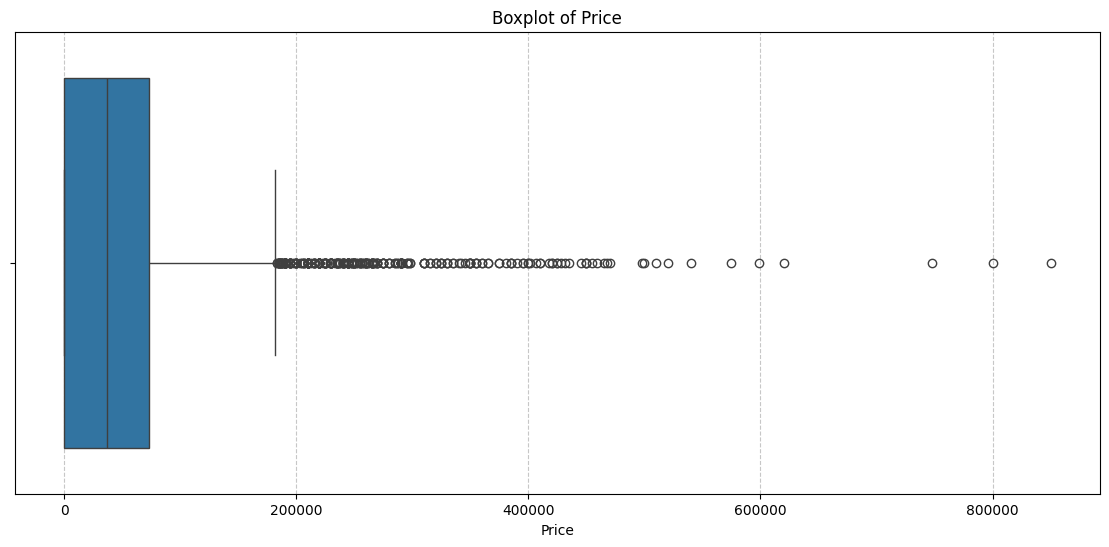

In [40]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.grid(axis='x', linestyle='--', alpha=0.7)

Kita bisa lihat ada banyak outlier di sebelah kanan boxplot

In [41]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]

rows_removed = data.shape[0] - data_no_outliers.shape[0]

print(f"Amount of data removed (due to it being outliers): {rows_removed}")

Amount of data removed (due to it being outliers): 261


In [42]:
data_no_outliers

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
...,...,...,...,...,...,...,...,...,...,...,...
5619,X-Trail,Jeddah,Nissan,Automatic,Saudi,Standard,2018,2.5,78794,False,68000
5620,Altima,Jeddah,Nissan,Automatic,Saudi,Semi Full,2020,2.5,58000,True,0
5621,Yukon,Dammam,GMC,Automatic,Saudi,Full,2016,5.3,48000,False,145000
5622,RX,Dammam,Lexus,Automatic,Gulf Arabic,Full,2016,2.5,81000,False,154000


**Check for multicollinearity using VIF**

In [43]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

numeric_columns = data_no_outliers.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_no_outliers[numeric_columns])

scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_columns
vif_data['VIF'] = [variance_inflation_factor(scaled_df.values, i) for i in range(len(numeric_columns))]

print(vif_data)

       Feature       VIF
0         Year  1.265319
1  Engine_Size  1.116497
2      Mileage  1.044207
3        Price  1.144323


## `Data Preparation`

**Encoding**

1. Merubah fitur/kolom `Region` menggunakan Binary Encoding, karena fitur ini tidak memiliki urutan
2. Merubah fitur/kolom `Gear_Type` menggunakan Binary Encoding, karena fitur ini tidak memiliki urutan
3. Merubah fitur/kolom `Origin` menggunakan Binary Encoding, karena fitur ini tidak memiliki urutan
4. Merubah fitur/kolom `Options` menggunakan Binary Encoding, karena fitur ini tidak memiliki urutan
5. Merubah fitur/kolom `Negotiable` menggunakan Binary Encoding, karena fitur ini cuman True atau False
6. Merubah fitur / kolom 'Type' dan 'Make' menggunakan Binary Encoding


In [44]:
import pandas as pd
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np

transformer = ColumnTransformer(
    transformers=[
        ('binary', BinaryEncoder(), ['Type','Make','Region','Gear_Type','Origin','Options']),
        ('scaler', RobustScaler(), ['Engine_Size', 'Mileage'])
    ],
    remainder='passthrough'
)


In [45]:
X = data_no_outliers.drop(columns='Price')  # Features
y = data_no_outliers['Price']

In [46]:
X['Negotiable'] = np.where(X['Negotiable']==True,1,0)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((4238, 10), (1060, 10))

In [48]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

X_train_transformed = X_train_transformed.astype(int)
X_test_transformed = X_test_transformed.astype(int)

## `Model Development`

Akan digunakan macam-macam model yang berbeda untuk dapat menentukan model mana yang terbaik

1. Decision Tree

Model yang memprediksi nilai dari variabel target dengan mempelajari keputusan yang diperoleh dari fitur data. Decision Tree membagi data menjadi subset berdasarkan nilai fitur, menciptakan cabang-cabang yang mewakili keputusan. Proses ini berlanjut secara rekursif (sesuai max depth) dan hasilnya adalah struktur pohon di mana setiap simpul daun mewakili prediksi.

2. Random Forest

Metode ensemble yang membangun beberapa Decision Tree selama pelatihan dan menghasilkan prediksi rata-rata dari setiap pohon. Ada unsur kebetulan dengan memilih subset fitur untuk setiap pemisahan untuk membantu mengurangi overfitting dan meningkatkan generalisasi.

3. XGBoost (Extreme Gradient Boosting)

Model yang membangun pohon secara berurutan, di mana setiap pohon baru mengoreksi kesalahan yang dibuat oleh pohon sebelumnya. XGBoost menggunakan teknik yang disebut "boosting" dimana pembelajar ditambahkan satu per satu untuk meminimalkan fungsi kehilangan. XGBoost juga menambahkan teknik regularisasi untuk mencegah overfitting.

4. Gradient Boosting

Gradient Boosting adalah model dimana tiap pohon berusaha meminimalkan kesalahan dari kombinasi prediksi semua pohon sebelumnya. Gradient Boosting menggunakan optimisasi gradient descent untuk memperbarui prediksi, dengan fokus pada area di mana prediksi sebelumnya salah. Model ini juga dapat mencakup berbagai fungsi kehilangan dan metode regularisasi.

5. Stacking Regressor

Teknik pembelajaran ensemble yang menggabungkan beberapa model untuk meningkatkan keefektifan prediksi. Prediksi dari model dasar digunakan sebagai input untuk model akhir yang belajar untuk menggabungkan prediksi ini secara optimal.

6. Voting Regressor

Metode ensemble yang menggabungkan prediksi dari beberapa model regresi. Voting Regressor dapat menggunakan soft voting atau hard voting untuk menghasilkan output akhir, sehingga memanfaatkan kekuatan kolektif dari semua model.

Hard Vote, keputusan akhir diambil berdasarkan suara terbanyak dari model-model yang terlibat.

Soft Vote, memberikan probabilitas atau nilai kepercayaan untuk setiap kelas.

Di kasus ini, kita menggunakan Soft Vote


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    StackingRegressor,
    VotingRegressor,
    GradientBoostingRegressor,
)
from xgboost import XGBRegressor
from sklearn.preprocessing import RobustScaler
import pandas as pd

models = {
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

param_distributions = {
    "Decision Tree": {
        'max_depth': [None] + list(range(1, 21)),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 11)
    },
    "Random Forest": {
        'n_estimators': range(50, 501, 50),
        'max_depth': [None] + list(range(1, 21)),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 11),
        'max_features': ['sqrt', 'log2']
    },
    "XGBoost": {
        'n_estimators': range(50, 501, 50),
        'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
        'max_depth': range(3, 11),
        'subsample': [0.6, 0.8, 1.0]
    },
    "Gradient Boosting": {
        'n_estimators': range(50, 301, 50),
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': range(3, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 11)
    }
}

results = {}

for model_name in models.keys():
    print(f"Running RandomizedSearchCV for {model_name}...")
    model = models[model_name]

    randomized_search = RandomizedSearchCV(
        model,
        param_distributions[model_name],
        n_iter=100,
        scoring='neg_mean_squared_error',
        cv=5,
        random_state=0,
        n_jobs=-1,
        error_score='raise'
    )

    randomized_search.fit(X_train_transformed, y_train)

    results[model_name] = {
        'best_model': randomized_search.best_estimator_,
        'best_params': randomized_search.best_params_,
        'best_score': -randomized_search.best_score_
    }

results_df = pd.DataFrame(results).T
print("Individual Model Results:")
print(results_df)
best_models = [(name, result['best_model']) for name, result in results.items()]

final_estimators = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    XGBRegressor(),
]

for final_estimator in final_estimators:
    print(f"Testing Stacking Regressor with {final_estimator.__class__.__name__} as final estimator...")
    stacking_regressor = StackingRegressor(estimators=best_models, final_estimator=final_estimator)
    stacking_regressor.fit(X_train_transformed, y_train)
    stacking_score = stacking_regressor.score(X_test_transformed, y_test)
    print(f"Stacking Regressor Test Score with {final_estimator.__class__.__name__}: {stacking_score}")

voting_regressor = VotingRegressor(estimators=best_models)
voting_regressor.fit(X_train_transformed, y_train)
voting_score = voting_regressor.score(X_test_transformed, y_test)
print(f"Voting Regressor Test Score: {voting_score}")


Running RandomizedSearchCV for Decision Tree...
Running RandomizedSearchCV for Random Forest...
Running RandomizedSearchCV for XGBoost...
Running RandomizedSearchCV for Gradient Boosting...
Individual Model Results:
                                                          best_model  \
Decision Tree      DecisionTreeRegressor(max_depth=15, min_sample...   
Random Forest      (DecisionTreeRegressor(max_depth=17, max_featu...   
XGBoost            XGBRegressor(base_score=None, booster=None, ca...   
Gradient Boosting  ([DecisionTreeRegressor(criterion='friedman_ms...   

                                                         best_params  \
Decision Tree      {'min_samples_split': 14, 'min_samples_leaf': ...   
Random Forest      {'n_estimators': 500, 'min_samples_split': 2, ...   
XGBoost            {'subsample': 0.8, 'n_estimators': 400, 'max_d...   
Gradient Boosting  {'n_estimators': 250, 'min_samples_split': 17,...   

                         best_score  
Decision Tree      52630

In [53]:

benchmark_results = {}

for model_name, model_info in results.items():
    model = model_info['best_model']  
    model.fit(X_train_transformed, y_train)  
    
    y_train_pred = model.predict(X_train_transformed)
    y_test_pred = model.predict(X_test_transformed)
    
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    benchmark_results[model_name] = {
        'Train R2': train_r2,
        'Test R2': test_r2
    }

final_estimators = [
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    XGBRegressor(),
]

best_models = [(name, model_info['best_model']) for name, model_info in results.items()]
for final_estimator in final_estimators:
    stacking_regressor = StackingRegressor(estimators=best_models, final_estimator=final_estimator)
    stacking_regressor.fit(X_train_transformed, y_train)

    y_train_pred_stacking = stacking_regressor.predict(X_train_transformed)
    y_test_pred_stacking = stacking_regressor.predict(X_test_transformed)
    
    benchmark_results[f'Stacking Regressor with {final_estimator.__class__.__name__}'] = {
        'Train R2': r2_score(y_train, y_train_pred_stacking),
        'Test R2': r2_score(y_test, y_test_pred_stacking)
    }

voting_regressor = VotingRegressor(estimators=best_models)
voting_regressor.fit(X_train_transformed, y_train)

y_train_pred_voting = voting_regressor.predict(X_train_transformed)
y_test_pred_voting = voting_regressor.predict(X_test_transformed)
benchmark_results['Voting Regressor'] = {
    'Train R2': r2_score(y_train, y_train_pred_voting),
    'Test R2': r2_score(y_test, y_test_pred_voting)
}

benchmark_results_df = pd.DataFrame(benchmark_results).T
print("Benchmark Results:")
print(benchmark_results_df)


Benchmark Results:
                                                   Train R2   Test R2
Decision Tree                                      0.837082  0.742022
Random Forest                                      0.959972  0.825082
XGBoost                                            0.990187  0.850963
Gradient Boosting                                  0.969568  0.841137
Stacking Regressor with GradientBoostingRegressor  0.975474  0.858600
Stacking Regressor with RandomForestRegressor      0.971260  0.850625
Stacking Regressor with DecisionTreeRegressor      0.860612  0.707860
Stacking Regressor with XGBRegressor               0.956935  0.831975
Voting Regressor                                   0.963910  0.847447


### **Kesimpulan dan Rekomendasi:**

**Kesimpulan:**

Berdasarkan analisis yang dilakukan di dalam notebook, model regresi yang telah diterapkan berhasil memberikan wawasan penting bagi Syarah.com dalam menghadapi tantangan di pasar mobil bekas di Arab Saudi. Hasil evaluasi menunjukkan bahwa model-model seperti **Stacking Regressor** dan **XGBoost** dapat memprediksi harga mobil dengan akurasi yang cukup tinggi. Ini penting untuk membantu Syarah.com dalam menentukan harga yang kompetitif dan mengidentifikasi mobil-mobil yang negotiable, sehingga dapat memaksimalkan profit.

Analisis menunjukkan bahwa ada beberapa mobil yang dapat diidentifikasi sebagai **negotiable** berdasarkan bagian kolom negotiable yang True atau False. Dengan demikian, Syarah.com memiliki potensi untuk membeli mobil-mobil tersebut dengan harga "0" dan juga mobil dengan harga yang lebih rendah, kemudian menjualnya dengan keuntungan yang lebih baik.

**Rekomendasi:**

1. **Implementasikan Model Terbaik**: Gunakan **Stacking Regressor** atau **XGBoost** sebagai model utama untuk memprediksi harga mobil. Model-model ini telah terbukti efektif dalam menangkap hubungan kompleks dalam data, sehingga dapat memberikan prediksi harga yang lebih akurat.

2. **Identifikasi Mobil Negotiable**: Gunakan model untuk memprediksi harga dan bandingkan dengan harga pasar yang aktual. Fokus pada mobil yang memiliki fitur-fitur dengan prediksi model negotiable atau harga yang rendah, untuk dapat memaksimalkan mobil-mobil bekas dengan rate harga rendah atau negosiasi yang lebih tinggi yang akhirnya memaksimalkan profit dan menambahkan orang berminat menggunakan Syarah.com.

Dengan mengikuti rekomendasi ini, Syarah.com dapat memaksimalkan profitabilitas sambil tetap menawarkan nilai yang baik kepada pelanggan di pasar mobil bekas yang kompetitif di Arab Saudi.

In [54]:

import pickle

best_stacking_regressor = StackingRegressor(estimators=best_models, final_estimator=GradientBoostingRegressor())
best_stacking_regressor.fit(X_train_transformed, y_train)

with open('best_stacking_regressor.pkl', 'wb') as f:
    pickle.dump(best_stacking_regressor, f)

print("Best Stacking Regressor model saved as 'best_stacking_regressor.pkl'.")


Best Stacking Regressor model saved as 'best_stacking_regressor.pkl'.
